In [60]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "iframe_connected"

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df_june = pd.read_csv("uber-raw-data-jun14.csv") # skiprows = 1 pour supprimer première ligne.

In [3]:
df_june

,Date/Time,Lat,Lon,Base
0,6/1/2014 0:00:00,40.7293,-73.9920,B02512
1,6/1/2014 0:01:00,40.7131,-74.0097,B02512
2,6/1/2014 0:04:00,40.3461,-74.6610,B02512
3,6/1/2014 0:04:00,40.7555,-73.9833,B02512
4,6/1/2014 0:07:00,40.6880,-74.1831,B02512
...,...,...,...,...
663839,6/30/2014 22:40:00,40.7332,-73.9872,B02764
663840,6/30/2014 23:12:00,40.7905,-73.9796,B02764
663841,6/30/2014 23:13:00,40.7640,-73.9887,B02764
663842,6/30/2014 23:15:00,40.7262,-73.9944,B02764


In [4]:
df_taxi = pd.read_csv("taxi-zone-lookup.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Uber/taxi-zone-lookup.csv'

In [5]:
df_taxi

NameError: name 'df_taxi' is not defined

In [6]:
N_LINES_SELECTED = 10000
df_june_sample = df_june.sample(n = N_LINES_SELECTED,)

In [7]:
df_june_sample

,Date/Time,Lat,Lon,Base
98244,6/9/2014 5:37:00,40.7809,-73.9829,B02598
212052,6/22/2014 15:54:00,40.7269,-73.9859,B02598
657796,6/11/2014 5:45:00,40.7382,-74.0084,B02764
405461,6/23/2014 8:07:00,40.6339,-73.9671,B02617
589352,6/20/2014 5:18:00,40.7193,-73.9601,B02682
...,...,...,...,...
500087,6/6/2014 22:29:00,40.7172,-73.9552,B02682
551144,6/13/2014 20:55:00,40.7682,-73.8624,B02682
151377,6/14/2014 18:31:00,40.6209,-74.0222,B02598
20615,6/19/2014 4:01:00,40.7199,-73.9951,B02512


In [8]:
temp = df_june_sample.iloc[0]['Date/Time']

In [9]:
temp

'6/9/2014 5:37:00'

In [10]:
type(temp)

str

In [11]:
import datetime as dt

In [12]:
temp

'6/9/2014 5:37:00'

In [13]:
dt.datetime.strptime(temp,"%m/%d/%Y %H:%M:%S")

datetime.datetime(2014, 6, 9, 5, 37)

In [14]:
df_june_sample["dateTime"] = df_june_sample["Date/Time"].map(lambda string: dt.datetime.strptime(string,"%m/%d/%Y %H:%M:%S"))

In [15]:
df_june_sample

,Date/Time,Lat,Lon,Base,dateTime
98244,6/9/2014 5:37:00,40.7809,-73.9829,B02598,2014-06-09 05:37:00
212052,6/22/2014 15:54:00,40.7269,-73.9859,B02598,2014-06-22 15:54:00
657796,6/11/2014 5:45:00,40.7382,-74.0084,B02764,2014-06-11 05:45:00
405461,6/23/2014 8:07:00,40.6339,-73.9671,B02617,2014-06-23 08:07:00
589352,6/20/2014 5:18:00,40.7193,-73.9601,B02682,2014-06-20 05:18:00
...,...,...,...,...,...
500087,6/6/2014 22:29:00,40.7172,-73.9552,B02682,2014-06-06 22:29:00
551144,6/13/2014 20:55:00,40.7682,-73.8624,B02682,2014-06-13 20:55:00
151377,6/14/2014 18:31:00,40.6209,-74.0222,B02598,2014-06-14 18:31:00
20615,6/19/2014 4:01:00,40.7199,-73.9951,B02512,2014-06-19 04:01:00


In [16]:
from sklearn.cluster import KMeans

In [17]:
df_june_sample.describe() #mean = centre de gravite des uber
#pas de valeurs aberrantes

,Lat,Lon
count,10000.000000,10000.000000
mean,40.740140,-73.974378
std,0.037839,0.054808
min,40.176800,-74.484200
25%,40.722000,-73.996600
50%,40.743800,-73.983600
75%,40.761200,-73.968100
max,41.211400,-73.041700


In [18]:
df_june_sample.info()
#pas de val manquantes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 98244 to 657997
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date/Time  10000 non-null  object        
 1   Lat        10000 non-null  float64       
 2   Lon        10000 non-null  float64       
 3   Base       10000 non-null  object        
 4   dateTime   10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 468.8+ KB


In [19]:
from sklearn.preprocessing import   StandardScaler

In [20]:
#Preprocessing

In [21]:
X_Clust = df_june_sample[['Lat', 'Lon']]


In [22]:
sc = StandardScaler()

In [23]:
X_clust_aftersc = sc.fit_transform(X_Clust)

In [24]:
X_clust_aftersc[0:5]

array([[ 1.07725207, -0.15550259],
       [-0.34990932, -0.21024231],
       [-0.05126258, -0.6207902 ],
       [-2.80779838,  0.13279327],
       [-0.55076907,  0.26051928]])

In [25]:
#Kmeans

In [26]:
est = KMeans(n_clusters = 5)

In [27]:
est.fit(X_clust_aftersc)

KMeans(n_clusters=5)

In [28]:
labelsX = est.labels_ #10000lignes   ici  10000valeurs qui correspondent aux 10000lignes

In [29]:
len(labelsX)

10000

In [30]:
df_june_sample['labels1'] = labelsX

In [31]:
df_june_sample.head()

,Date/Time,Lat,Lon,Base,dateTime,labels1
98244,6/9/2014 5:37:00,40.7809,-73.9829,B02598,2014-06-09 05:37:00,0
212052,6/22/2014 15:54:00,40.7269,-73.9859,B02598,2014-06-22 15:54:00,2
657796,6/11/2014 5:45:00,40.7382,-74.0084,B02764,2014-06-11 05:45:00,0
405461,6/23/2014 8:07:00,40.6339,-73.9671,B02617,2014-06-23 08:07:00,2
589352,6/20/2014 5:18:00,40.7193,-73.9601,B02682,2014-06-20 05:18:00,2


In [32]:
df_june_sample.describe()

,Lat,Lon,labels1
count,10000.000000,10000.000000,10000.000000
mean,40.740140,-73.974378,1.013400
std,0.037839,0.054808,1.204643
min,40.176800,-74.484200,0.000000
25%,40.722000,-73.996600,0.000000
50%,40.743800,-73.983600,0.000000
75%,40.761200,-73.968100,2.000000
max,41.211400,-73.041700,4.000000


In [33]:
df_june_sample['labels1'].value_counts()

0    5393
2    3624
4     563
1     313
3     107
Name: labels1, dtype: int64

<AxesSubplot:>

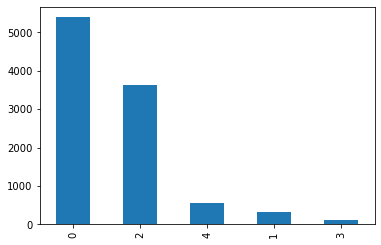

In [34]:
df_june_sample['labels1'].value_counts().plot.bar()

In [61]:
# Utilisation de la méthode Elbow pour trouver le nombre optimal de clusters

wcss =  []
for i in range (2,11): 
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(X_clust_aftersc)
    wcss.append(kmeans.inertia_)
    
print(wcss)

[14017.69250989453, 9520.493795715058, 7748.722499732985, 6345.692148780142, 5092.29082348807, 4315.843241133211, 3698.506740902681, 3284.607909171716, 2892.4166641524794]


In [62]:
fig = px.line(x = range(2,11), y = wcss)
fig.show()

0
(5393, 6)
1
(313, 6)
2
(3624, 6)
3
(107, 6)
4
(563, 6)


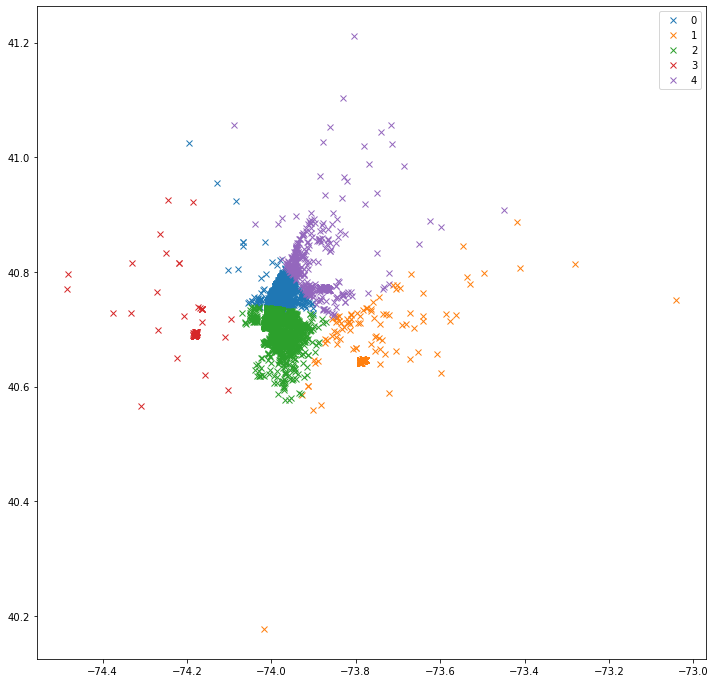

In [35]:
plt.figure(figsize=(12,12))
for cluster in set(labelsX):
    print(cluster)
    df_clustloc = df_june_sample[df_june_sample['labels1'] == cluster]
    print(df_clustloc.shape)
    plt.plot(df_clustloc['Lon'], df_clustloc['Lat'],'x', label= str(cluster))
plt.legend()
plt.show()
    

In [36]:
#Dscan

In [37]:
from sklearn.cluster import DBSCAN

In [38]:
#epsfloat, default=0.5
#The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

In [39]:
est2 = DBSCAN(eps = 0.40) #eps depend de l'utilisation qu on en fait   dbscan bon pour outliers
#ici avec 2  va chercher les voisins plus loin  on part d'une zone de hte densite   puis agrege le plus grd nbre de points

In [40]:
est2.fit(X_clust_aftersc)

DBSCAN(eps=0.4)

In [41]:
labelsX2 = est2.labels_

In [42]:
len(labelsX2)

10000

In [43]:
df_june_sample['labels2'] = labelsX2

In [44]:
df_june_sample.head()

,Date/Time,Lat,Lon,Base,dateTime,labels1,labels2
98244,6/9/2014 5:37:00,40.7809,-73.9829,B02598,2014-06-09 05:37:00,0,0
212052,6/22/2014 15:54:00,40.7269,-73.9859,B02598,2014-06-22 15:54:00,2,0
657796,6/11/2014 5:45:00,40.7382,-74.0084,B02764,2014-06-11 05:45:00,0,0
405461,6/23/2014 8:07:00,40.6339,-73.9671,B02617,2014-06-23 08:07:00,2,0
589352,6/20/2014 5:18:00,40.7193,-73.9601,B02682,2014-06-20 05:18:00,2,0


In [45]:
df_june_sample.describe()

,Lat,Lon,labels1,labels2
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,40.740140,-73.974378,1.013400,0.033800
std,0.037839,0.054808,1.204643,0.306051
min,40.176800,-74.484200,0.000000,-1.000000
25%,40.722000,-73.996600,0.000000,0.000000
50%,40.743800,-73.983600,0.000000,0.000000
75%,40.761200,-73.968100,2.000000,0.000000
max,41.211400,-73.041700,4.000000,5.000000


In [46]:
df_june_sample['labels2'].value_counts() #encore plus heterogenes /kmeans

 0    9570
 1     219
-1     113
 2      79
 3       7
 4       7
 5       5
Name: labels2, dtype: int64

0
(9570, 7)
1
(219, 7)
2
(79, 7)
3
(7, 7)
4
(7, 7)
5
(5, 7)
-1
(113, 7)


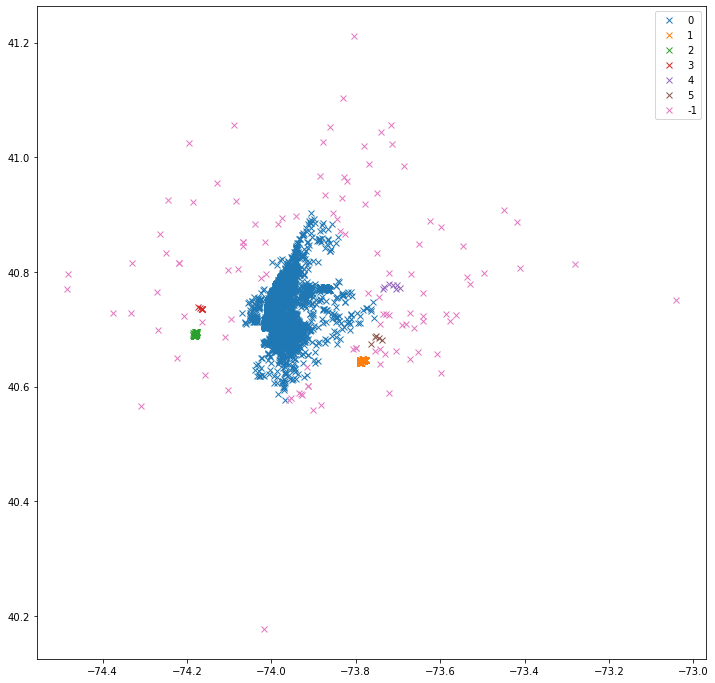

In [47]:
plt.figure(figsize=(12,12))
for cluster in set(labelsX2):
    print(cluster)
    df_clustloc = df_june_sample[df_june_sample['labels2'] == cluster]
    print(df_clustloc.shape)
    plt.plot(df_clustloc['Lon'], df_clustloc['Lat'],'x', label= str(cluster))
plt.legend()
plt.show()

In [48]:
#datetime

In [49]:
df_june_sample

,Date/Time,Lat,Lon,Base,dateTime,labels1,labels2
98244,6/9/2014 5:37:00,40.7809,-73.9829,B02598,2014-06-09 05:37:00,0,0
212052,6/22/2014 15:54:00,40.7269,-73.9859,B02598,2014-06-22 15:54:00,2,0
657796,6/11/2014 5:45:00,40.7382,-74.0084,B02764,2014-06-11 05:45:00,0,0
405461,6/23/2014 8:07:00,40.6339,-73.9671,B02617,2014-06-23 08:07:00,2,0
589352,6/20/2014 5:18:00,40.7193,-73.9601,B02682,2014-06-20 05:18:00,2,0
...,...,...,...,...,...,...,...
500087,6/6/2014 22:29:00,40.7172,-73.9552,B02682,2014-06-06 22:29:00,2,0
551144,6/13/2014 20:55:00,40.7682,-73.8624,B02682,2014-06-13 20:55:00,4,0
151377,6/14/2014 18:31:00,40.6209,-74.0222,B02598,2014-06-14 18:31:00,2,0
20615,6/19/2014 4:01:00,40.7199,-73.9951,B02512,2014-06-19 04:01:00,2,0


In [50]:
temp = df_june_sample.iloc[0]['dateTime'] #iloc position et loc index
temp

Timestamp('2014-06-09 05:37:00')

In [51]:
temp.strftime('%A')

'Monday'

In [52]:
df_june_sample['days_of_week'] = df_june_sample['dateTime'].map(lambda d:d.strftime('%A') )


In [53]:
df_june_sample

,Date/Time,Lat,Lon,Base,dateTime,labels1,labels2,days_of_week
98244,6/9/2014 5:37:00,40.7809,-73.9829,B02598,2014-06-09 05:37:00,0,0,Monday
212052,6/22/2014 15:54:00,40.7269,-73.9859,B02598,2014-06-22 15:54:00,2,0,Sunday
657796,6/11/2014 5:45:00,40.7382,-74.0084,B02764,2014-06-11 05:45:00,0,0,Wednesday
405461,6/23/2014 8:07:00,40.6339,-73.9671,B02617,2014-06-23 08:07:00,2,0,Monday
589352,6/20/2014 5:18:00,40.7193,-73.9601,B02682,2014-06-20 05:18:00,2,0,Friday
...,...,...,...,...,...,...,...,...
500087,6/6/2014 22:29:00,40.7172,-73.9552,B02682,2014-06-06 22:29:00,2,0,Friday
551144,6/13/2014 20:55:00,40.7682,-73.8624,B02682,2014-06-13 20:55:00,4,0,Friday
151377,6/14/2014 18:31:00,40.6209,-74.0222,B02598,2014-06-14 18:31:00,2,0,Saturday
20615,6/19/2014 4:01:00,40.7199,-73.9951,B02512,2014-06-19 04:01:00,2,0,Thursday


In [54]:
Tableau1 = df_june_sample.groupby('labels1')['days_of_week'].value_counts()


In [55]:
Tableau2 = df_june_sample.groupby('labels2')['days_of_week'].value_counts()

In [56]:
Tableau1
Tableau11 = pd.DataFrame(Tableau1)
Tableau11

days_of_week
labels1 days_of_week              
0       Thursday              1034
        Wednesday              924
        Friday                 864
        Tuesday                792
        Monday                 738
        Saturday               524
        Sunday                 517
1       Sunday                  70
        Monday                  55
        Thursday                42
        Saturday                40
        Wednesday               40
        Friday                  37
        Tuesday                 29
2       Friday                 585
        Thursday               577
        Saturday               545
        Sunday                 516
        Wednesday              476
        Tuesday                474
        Monday                 451
3       Monday                  22
        Wednesday               20
        Tuesday                 18
        Thursday                17
        Friday                  13
        Saturday                 9
        Sunday                   8
4       Sunday                  99
        Monday                  97
        Friday                  80
        Thursday                78
        Saturday                77
        Wednesday               74
        Tuesday                 58